In [1]:
# import necessary libraries
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize

In [4]:
import zipfile
import os

# Replace 'your_file.zip' with the actual file name if it's different
file_path = '/content/brain-tumor-detection.zip'

# Check if the file exists before attempting to open it
if os.path.exists(file_path):
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall('/content/dataset')
        print("File extracted successfully!")
    except zipfile.BadZipFile:
        print(f"Error: {file_path} is not a valid zip file or is corrupted.")
else:
    print(f"Error: {file_path} does not exist.")

os.listdir('/content/dataset')  # List extracted files

File extracted successfully!


['brain-tumor-detection']

In [5]:
image_directory="/content/dataset/brain-tumor-detection/"
no_tumor_images=os.listdir(image_directory + "no")
yes_tumor_images=os.listdir(image_directory + "yes")

In [7]:
!pip install opencv-contrib-python

# **Divide the data into images and label**

In [6]:
dataset=[]
label=[]
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split(".")[1]=="jpg"):
    image=cv2.imread(image_directory + "no/" + image_name)
    image=Image.fromarray(image,"RGB")
    image=image.resize((224,224))
    dataset.append(np.array(image))
    label.append(0)
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split(".")[1]=="jpg"):
    image=cv2.imread(image_directory + "yes/" + image_name)
    image=Image.fromarray(image,"RGB")
    image=image.resize((224,224))
    dataset.append(np.array(image))
    label.append(1)

In [8]:
print(len(dataset))
print(len(label))

3000
3000


In [9]:
dataset=np.array(dataset)
label=np.array(label)

### **Train- test Split the data**

In [10]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


# **Normalize the data**

In [12]:
x_train=normalize(x_train)
x_test=normalize(x_test)

# **model building using VGG19**

In [13]:


# model building using VGG19
model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable=False
x=Flatten()(model.output)
x=Dense(4096,activation='relu')(x) # 1st hidden layer
dropout=Dropout(0.2)(x)
x=Dense(4096,activation='relu')(dropout) # 2nd hidden layer
x=Dense(1,activation='sigmoid')(x) # output layer
model=Model(inputs=model.input,outputs=x)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,574,337 (532.43 MB)

 Trainable params: 119,549,953 (456.05 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# **Trainining Model**

In [15]:
# train the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.6145 - loss: 1.0201 - val_accuracy: 0.7767 - val_loss: 0.4695
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.7796 - loss: 0.4625 - val_accuracy: 0.8283 - val_loss: 0.3817
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - accuracy: 0.8073 - loss: 0.3874 - val_accuracy: 0.7567 - val_loss: 0.5196
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.8352 - loss: 0.3543 - val_accuracy: 0.7733 - val_loss: 0.4649
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.8742 - loss: 0.2738 - val_accuracy: 0.8767 - val_loss: 0.2660
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.8974 - loss: 0.2373 - val_accuracy: 0.8233 - val_loss: 0.4305
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.8805 - loss: 0.2408 - val_accuracy: 0.8783 - val_loss: 0.2814
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.9128 - loss: 0.1884 - val_accu

# **Plotting the Accuracy and Losses**

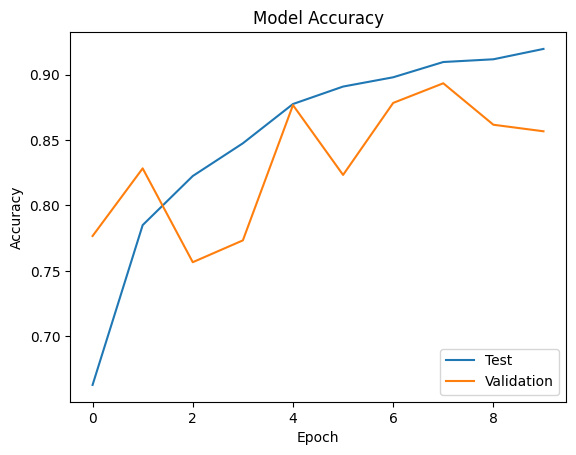

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')

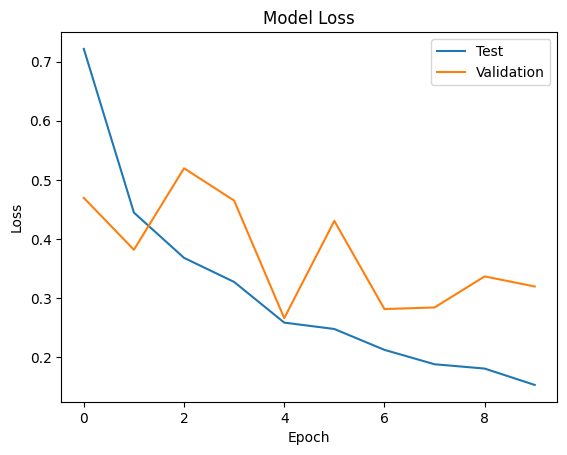

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# **Testing the model**

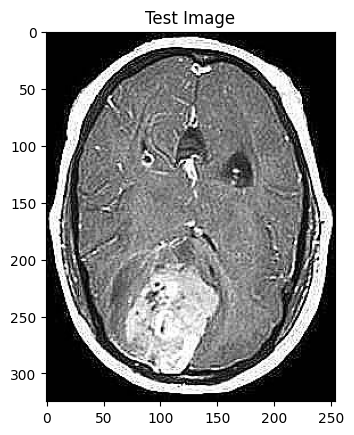

In [18]:
test_image=img=cv2.imread("/content/dataset/brain-tumor-detection/yes/y1003.jpg")
plt.imshow(test_image)
plt.title("Test Image")
plt.show()

In [19]:
# preprocess the test image before passing to model
test_image=Image.fromarray(test_image)
test_image=test_image.resize((224,224))
test_image=np.array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image=normalize(test_image)

# **Predection**

In [20]:
prediction=model.predict(test_image)
if prediction[0][0] > 0.5:
    print("Prediction: Tumor Detected")
else:
    print("Prediction: No Tumor")
predicted_labels = (prediction > 0.5)
predicted_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Tumor Detected


array([[ True]])